# Kalman Filter with Constant Velocity

Section 9.1.3.2 presents the multivariate Kalman filter, with a general framework given in Figure 9.11.  This example illustrates Kalman filtering with a constant velocity model.

Begin by setting the library path

In [18]:
import lib_path

Set the start time (s), end time (s) and time step (s)

In [19]:
start = 0.0

end = 20.0

step = 0.1

Calculate the number of updates and create the time array with the `linspace` routine from `scipy`

In [20]:
from scipy import linspace

number_of_updates = round( (end - start) / step) + 1

t, dt = linspace(start, end, number_of_updates, retstep=True)

Set the initial position (m)

In [21]:
px = 7.0

py = 11.0

pz = 21.0

Set the initial velocity (m/s)

In [22]:
vx = 10.0

vy = 20.0

vz = 15.0

Set the measurement noise (m^2) and process variance ( m^2, (m/s)^2, (m/s/s)^2)

In [23]:
measurement_noise_variance = 10.0

process_noise_variance = 1e-6

Create the target trajectory

In [24]:
from scipy import zeros

x_true = zeros([6, number_of_updates])


x = px + vx * t

y = py + vy * t

z = pz + vz * t



x_true[0] = x

x_true[1] = vx



x_true[2] = y

x_true[3] = vy



x_true[4] = z

x_true[5] = vz


Generate the measurement noise using the `random` routines from `scipy`

In [25]:
from scipy import random, sqrt

v = sqrt(measurement_noise_variance) * (random.rand(number_of_updates) - 0.5)

Initialize state and input control vector

In [26]:
from scipy import zeros_like

x = zeros(6)

u = zeros_like(x)

Initialize the covariance and control matrix

In [27]:
from scipy import eye

P = 1.0e3 * eye(6)

B = zeros_like(P)

Initialize measurement and process noise variance

In [28]:
R = measurement_noise_variance * eye(3)

Q = process_noise_variance * eye(6)

State transition matrix

In [29]:
A = eye(6)

A[0, 1] = dt

A[2, 3] = dt

A[4, 5] = dt

Measurement transition matrix

In [30]:
H = zeros([3, 6])

H[0, 0] = 1

H[1, 2] = 1

H[2, 4] = 1

Initialize the Kalman filter

In [31]:
from Libs.tracking import kalman

kf = kalman.Kalman(x, u, P, A, B, Q, H, R)

Generate the measurements

In [32]:
from scipy import matmul

z = [matmul(H, x_true[:, i]) + v[i] for i in range(number_of_updates)]

Update the filter for each measurement

In [33]:
kf.filter(z)

Display the results of the constant acceleration Kalman filter using the `matplotlib` routines

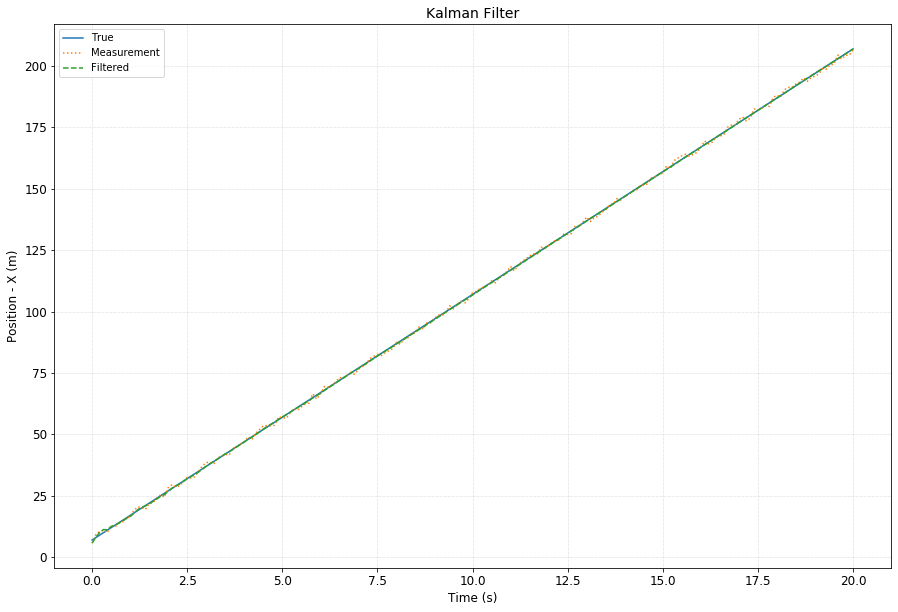

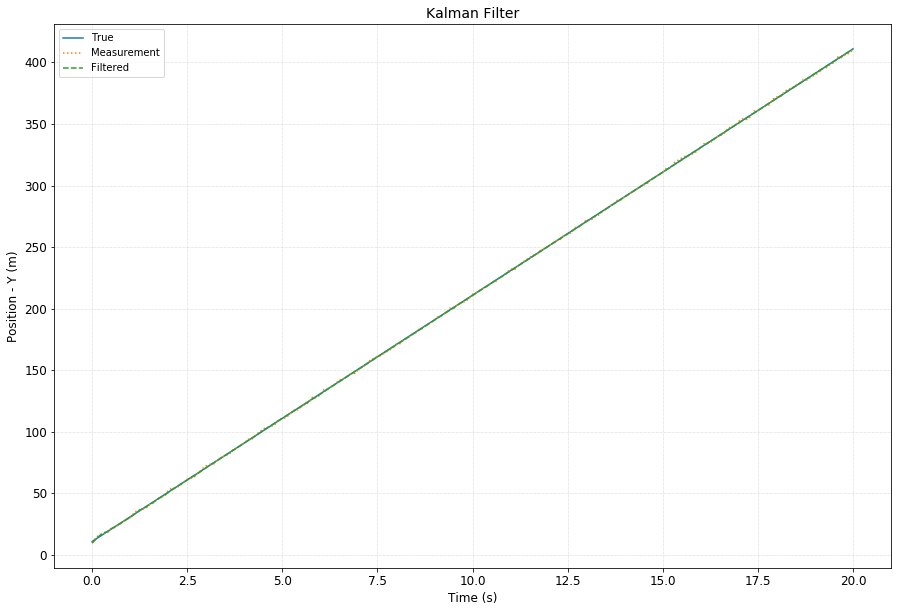

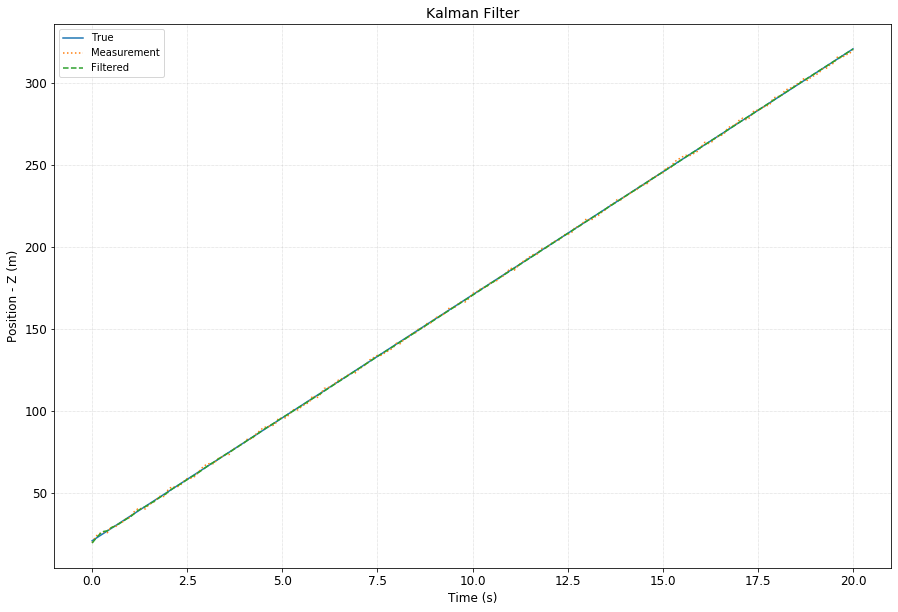

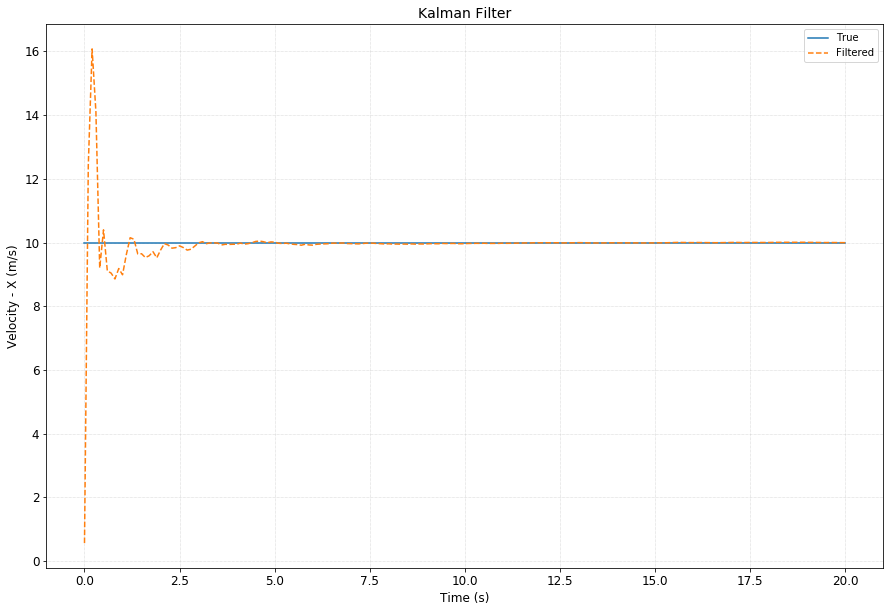

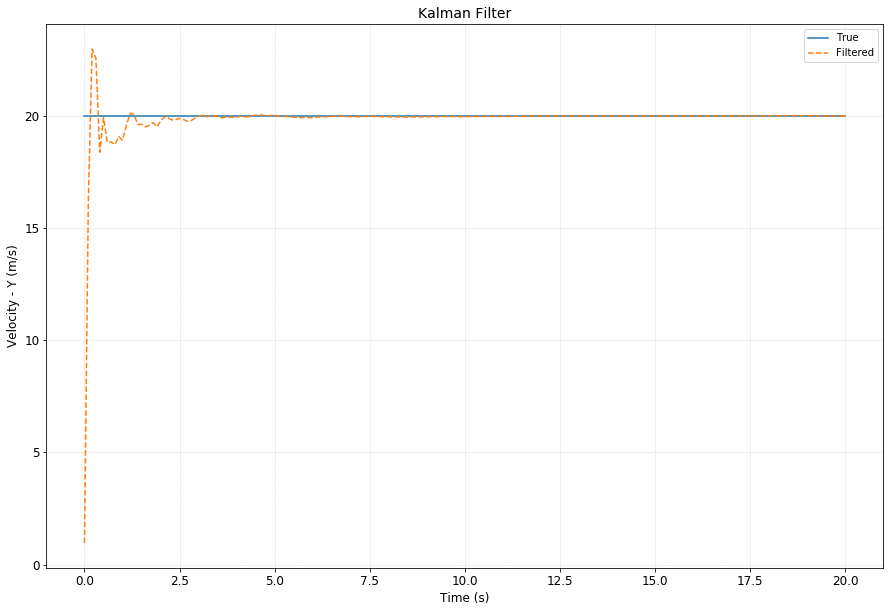

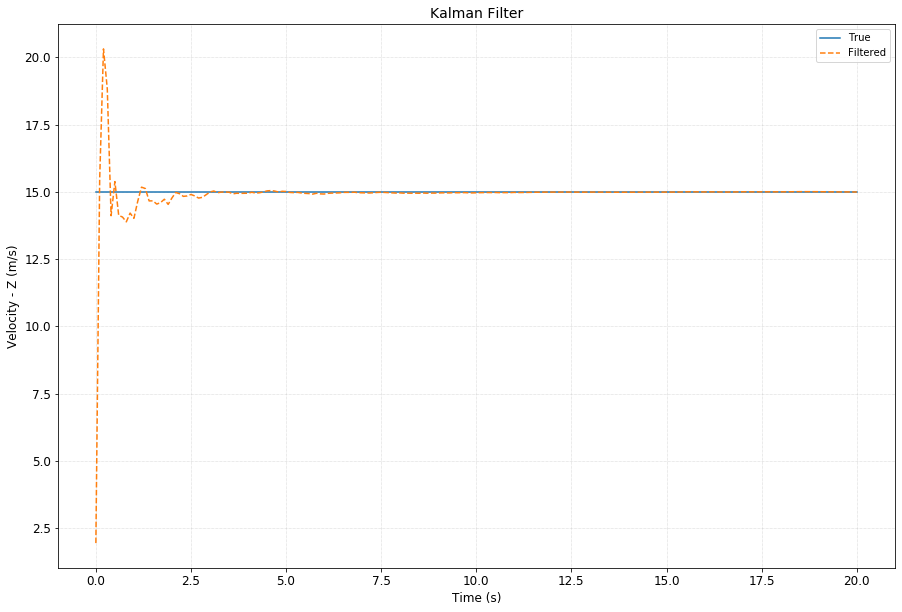

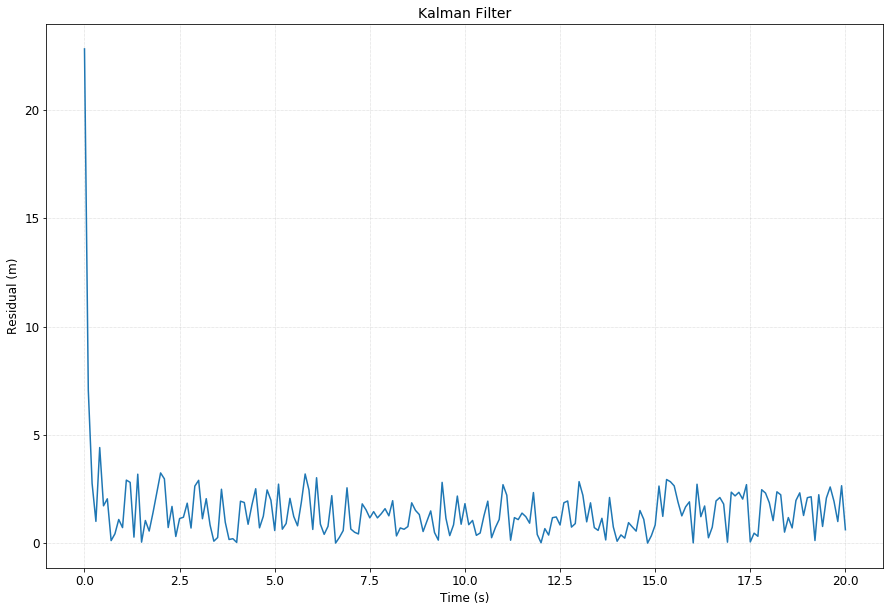

In [34]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Position - X

plt.figure()

plt.plot(t, x_true[0, :], '', label='True')

plt.plot(t, [z[0] for z in z], ':', label='Measurement')

plt.plot(t, [x[0] for x in kf.state], '--', label='Filtered')

plt.ylabel('Position - X (m)', size=12)

plt.legend(loc='best', prop={'size': 10})

# Set the plot title and labels

plt.title('Kalman Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Position - Y

plt.figure()

plt.plot(t, x_true[2, :], '', label='True')

plt.plot(t, [z[1] for z in z], ':', label='Measurement')

plt.plot(t, [x[2] for x in kf.state], '--', label='Filtered')

plt.ylabel('Position - Y (m)', size=12)

plt.legend(loc='best', prop={'size': 10})

# Set the plot title and labels

plt.title('Kalman Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Position - Z

plt.figure()

plt.plot(t, x_true[4, :], '', label='True')

plt.plot(t, [z[2] for z in z], ':', label='Measurement')

plt.plot(t, [x[4] for x in kf.state], '--', label='Filtered')

plt.ylabel('Position - Z (m)', size=12)

plt.legend(loc='best', prop={'size': 10})

# Set the plot title and labels

plt.title('Kalman Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Velocity - X

plt.figure()

plt.plot(t, x_true[1, :], '', label='True')

plt.plot(t, [x[1] for x in kf.state], '--', label='Filtered')

plt.ylabel('Velocity - X (m/s)', size=12)

plt.legend(loc='best', prop={'size': 10})

# Set the plot title and labels

plt.title('Kalman Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Velocity - Y

plt.figure()

plt.plot(t, x_true[3, :], '', label='True')

plt.plot(t, [x[3] for x in kf.state], '--', label='Filtered')

plt.ylabel('Velocity - Y (m/s)', size=12)

plt.legend(loc='best', prop={'size': 10})

# Set the plot title and labels

plt.title('Kalman Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Velocity - Z

plt.figure()

plt.plot(t, x_true[5, :], '', label='True')

plt.plot(t, [x[5] for x in kf.state], '--', label='Filtered')

plt.ylabel('Velocity - Z (m/s)', size=12)

plt.legend(loc='best', prop={'size': 10})

# Set the plot title and labels

plt.title('Kalman Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Residual

plt.figure()

plt.plot(t, kf.residual, '')

plt.ylabel('Residual (m)', size=12)



# Set the plot title and labels

plt.title('Kalman Filter', size=14)

plt.xlabel('Time (s)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)